In [20]:
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt
from scipy.stats import linregress

In [21]:
hdi_df = pd.read_csv('../data-sources/Human Development Index - Full.csv')
imf_gdp_df = pd.read_csv('../data-sources/gdp-per-capita.csv')

min_year = 1990
current_datetime = datetime.now()
current_year = current_datetime.year


In [22]:
column_list = [col for col in hdi_df.columns if col.startswith('Human Development Index (') and (int(col.replace(')', '').replace('Human Development Index (', '')) >= min_year) and (int(col.replace(')', '').replace('Human Development Index (', '')) <= current_year)]
column_list = ['Country'] + column_list

hdi_clean_df = hdi_df[column_list].dropna()
clean_df_columns = hdi_clean_df.columns
clean_df_columns = [col.replace(')', '').replace('Human Development Index (', '') for col in clean_df_columns]
hdi_clean_df.columns = clean_df_columns
hdi_clean_df.reset_index(drop=True, inplace=True)
hdi_clean_df = pd.melt(hdi_clean_df, id_vars=['Country'], var_name='Year').sort_values(by=['Country', 'Year'])
hdi_clean_df

,Country,Year,value
0,Afghanistan,1990,0.273
141,Afghanistan,1991,0.279
282,Afghanistan,1992,0.287
423,Afghanistan,1993,0.297
564,Afghanistan,1994,0.292
...,...,...,...
3947,Zimbabwe,2017,0.594
4088,Zimbabwe,2018,0.602
4229,Zimbabwe,2019,0.601
4370,Zimbabwe,2020,0.600


In [50]:
imf_gdp_df
column_list = [col for col in imf_gdp_df.columns if col.startswith('y') and (int(col.replace('y', '')) >= min_year) and (int(col.replace('y', '')) <= current_year)]
column_list = ['Country'] + column_list
clean_imf_gdp_df = imf_gdp_df[column_list].dropna()
clean_df_columns = clean_imf_gdp_df.columns
clean_df_columns = [col.replace('y', '') for col in clean_df_columns]
clean_imf_gdp_df.columns = clean_df_columns
clean_imf_gdp_df.rename(columns={'Countr': 'Country'}, inplace=True)
clean_imf_gdp_df.reset_index(drop=True, inplace=True)
clean_imf_gdp_df = pd.melt(clean_imf_gdp_df, id_vars=['Country'], var_name='Year').sort_values(by=['Country', 'Year'])
clean_imf_gdp_df_2023 = clean_imf_gdp_df[clean_imf_gdp_df['Year'] == '2023'].sort_values(by='value', ascending=False)
clean_imf_gdp_df_2023.reset_index(drop=True, inplace=True)
clean_imf_gdp_df_2023

,Country,Year,value
7713,Luxembourg,2023,104077.46
7711,Ireland,2023,95688.78
7737,Switzerland,2023,89037.46
7734,Other Western Europe,2023,84066.09
7736,Norway,2023,77978.30
...,...,...,...
7852,Democratic Republic of Congo,2023,482.84
7787,Afghanistan,2023,393.02
7861,Malawi,2023,354.20
7850,Central African Republic,2023,337.79


In [24]:
hdi_gdp_combined_df = pd.merge(hdi_clean_df, clean_imf_gdp_df, on=['Country', 'Year'], how='inner')
hdi_gdp_combined_df

,Country,Year,value_x,value_y
0,Afghanistan,1990,0.273,359.01
1,Afghanistan,1991,0.279,359.14
2,Afghanistan,1992,0.287,330.10
3,Afghanistan,1993,0.297,282.62
4,Afghanistan,1994,0.292,252.16
...,...,...,...,...
4091,Zimbabwe,2017,0.594,1525.54
4092,Zimbabwe,2018,0.602,1573.55
4093,Zimbabwe,2019,0.601,1421.09
4094,Zimbabwe,2020,0.600,1320.88


In [25]:
hdi_gdp_combined_df.rename(columns={'value_x': 'HDI', 'value_y': 'GDP'}, inplace=True)
hdi_gdp_combined_df

,Country,Year,HDI,GDP
0,Afghanistan,1990,0.273,359.01
1,Afghanistan,1991,0.279,359.14
2,Afghanistan,1992,0.287,330.10
3,Afghanistan,1993,0.297,282.62
4,Afghanistan,1994,0.292,252.16
...,...,...,...,...
4091,Zimbabwe,2017,0.594,1525.54
4092,Zimbabwe,2018,0.602,1573.55
4093,Zimbabwe,2019,0.601,1421.09
4094,Zimbabwe,2020,0.600,1320.88


In [26]:
hdi_gdp_combined_df.set_index(['Country', 'Year'], inplace=True)

In [33]:
hdi_gdp_combined_df.head()

HDI     GDP
Country     Year               
Afghanistan 1990  0.273  359.01
            1991  0.279  359.14
            1992  0.287  330.10
            1993  0.297  282.62
            1994  0.292  252.16

In [28]:
hdi_gdp_combined_df['GDP'] = hdi_gdp_combined_df['GDP'].astype(float)

<Axes: xlabel='Year'>

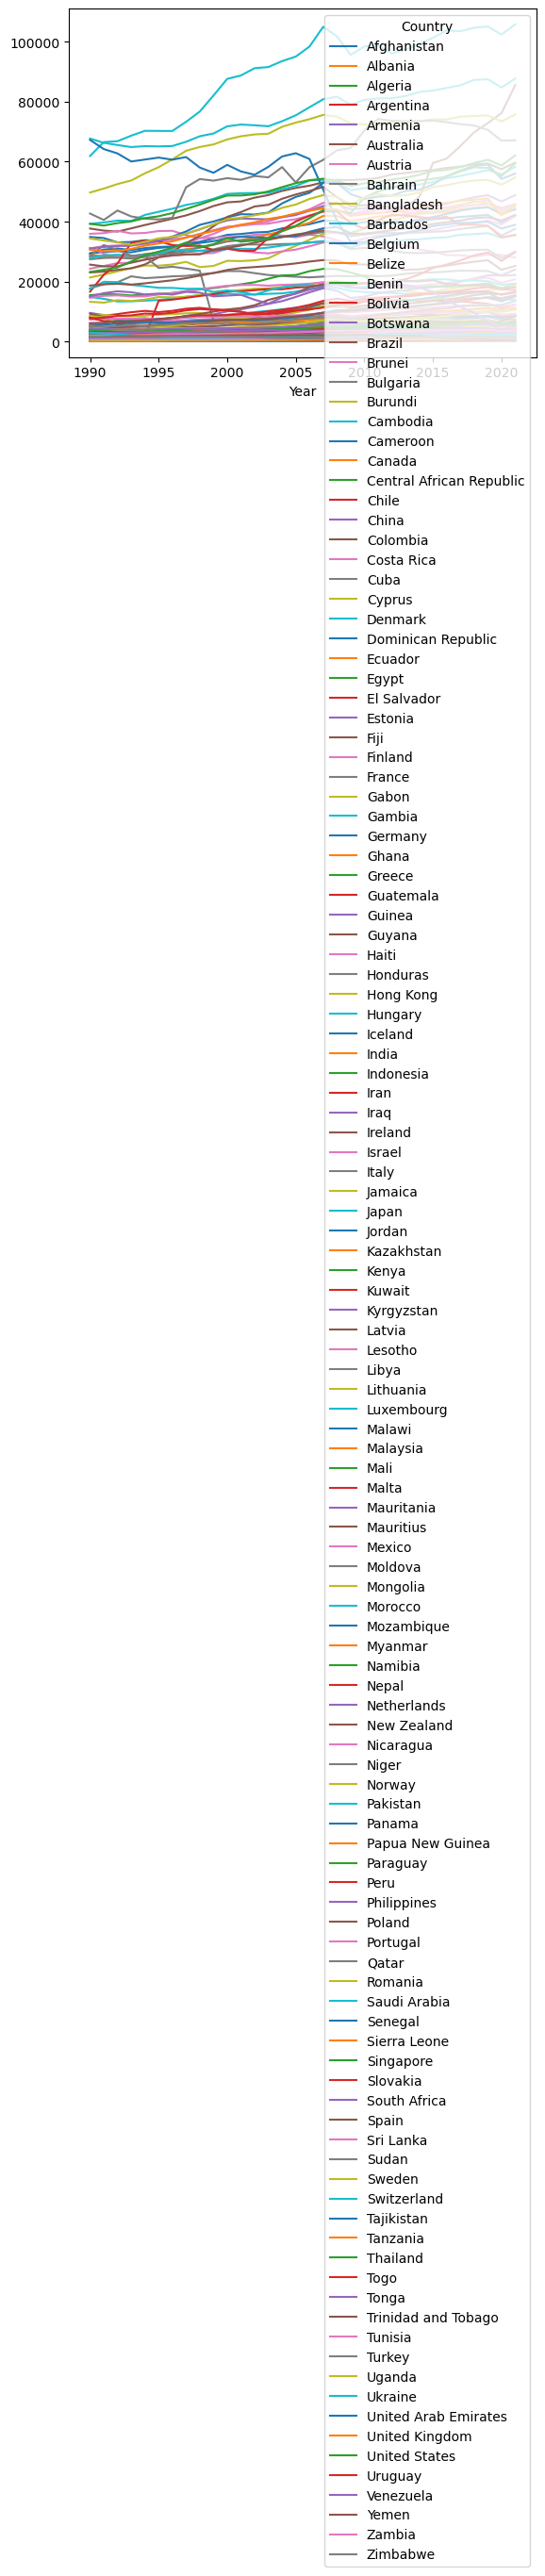

In [29]:
hdi_gdp_combined_df['GDP'].unstack(level='Country').plot()

<Axes: xlabel='Year'>

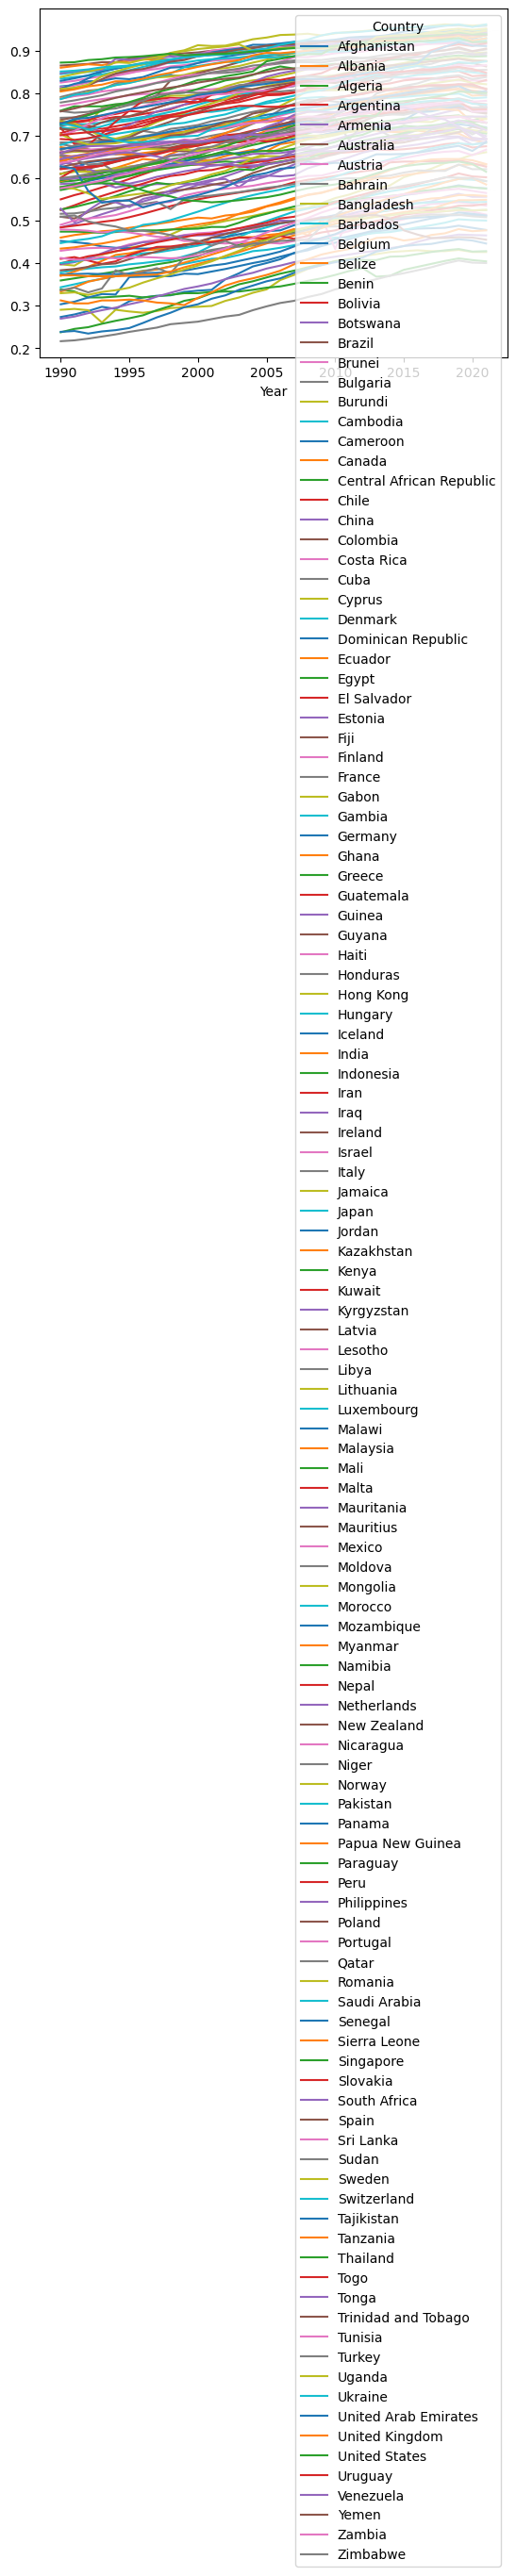

In [30]:
hdi_gdp_combined_df['HDI'].unstack(level='Country').plot()

<Axes: xlabel='HDI', ylabel='GDP'>

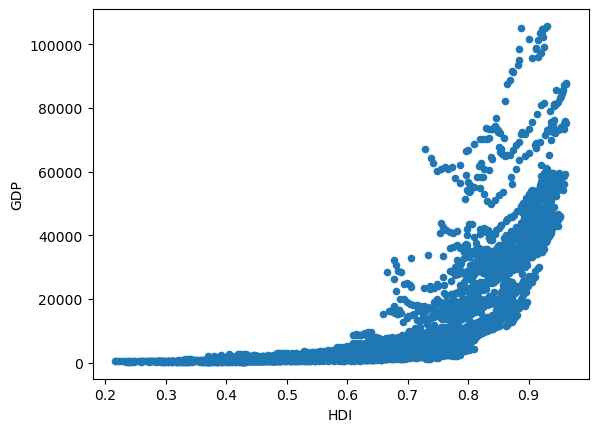

In [14]:
#Ask about inclusion.  Difficult to read.
hdi_gdp_combined_df.plot.scatter(x='HDI', y='GDP')

In [15]:
average_by_country_df = hdi_gdp_combined_df.groupby(level='Country').mean()
average_by_country_df

,HDI,GDP
Country,,
Afghanistan,0.394906,426.996562
Albania,0.716750,2726.741562
Algeria,0.679969,3592.743750
Argentina,0.800656,11499.499062
Armenia,0.704438,2351.685312
...,...,...
Uruguay,0.768500,12119.609688
Venezuela,0.715375,15102.825313
Yemen,0.459344,1797.057812


In [16]:
average_by_country_df.corr()

,HDI,GDP
HDI,1.000000,0.731628
GDP,0.731628,1.000000


<Axes: xlabel='GDP', ylabel='HDI'>

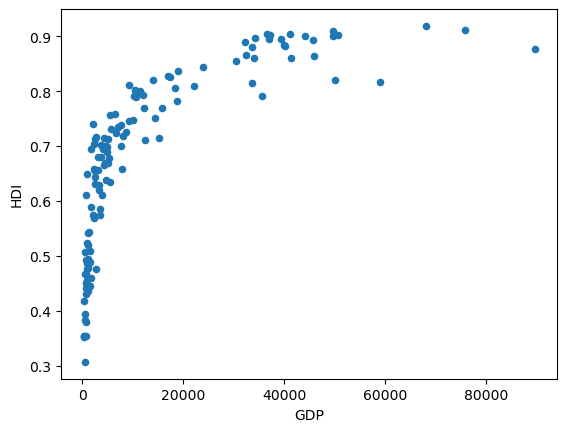

In [17]:
average_by_country_df.plot.scatter(x='GDP', y='HDI')

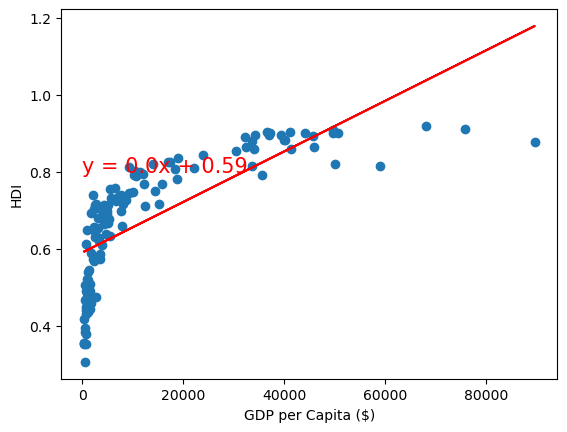

In [36]:
# Add the linear regression equation and line to plot
x_values = average_by_country_df['GDP']
y_values = average_by_country_df['HDI']

# Ask about the slope value on this
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('GDP per Capita ($)')
plt.ylabel('HDI')
plt.show()

In [19]:

#hdi_gdp_combined_df.plot.line(x='Year', y='HDI', figsize=(20, 10), title='Human Development')
hdi_gdp_combined_albania_df = hdi_gdp_combined_df[hdi_gdp_combined_df['Country'] == 'Albania']
hdi_gdp_combined_albania_df[['Year', 'GDP']]
#plt.plot(hdi_gdp_combined_albania_df['Year'], hdi_gdp_combined_albania_df['HDI'], color='red')
#plt.plot(hdi_gdp_combined_albania_df['Year'], hdi_gdp_combined_albania_df['GDP'], color='blue')

KeyError: 'Country'